In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import joblib
import os

In [2]:
X_pca = pd.read_csv('../data/final_data.csv')

# Analyze K value

## 1. Elbow method

In [3]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans (n_clusters = k, random_state = 42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [4]:
knee = KneeLocator(range(1, 11), wcss, curve = "convex", direction = 'decreasing')
optimal_k = knee.elbow

In [5]:
print("best k =", optimal_k)

best k = 4


Text(0, 0.5, 'wcss')

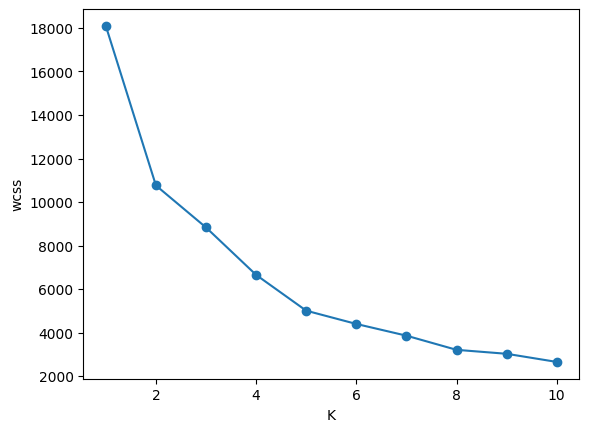

In [6]:
# plot
plt.plot(range(1, 11), wcss, marker = 'o')
plt.xlabel('K')
plt.ylabel('wcss')

## 2. Silhouette Score

In [7]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k , random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)
    

Text(0, 0.5, 'Silhouette score')

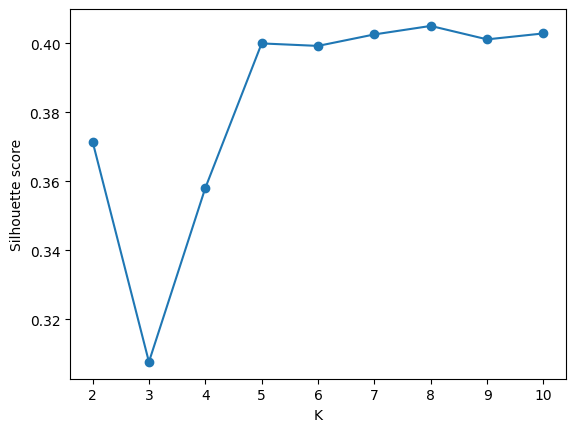

In [8]:
# plot
plt.plot(range(2, 11), scores, marker = 'o')
plt.xlabel('K')
plt.ylabel('Silhouette score')

Text(0, 0.5, 'SS')

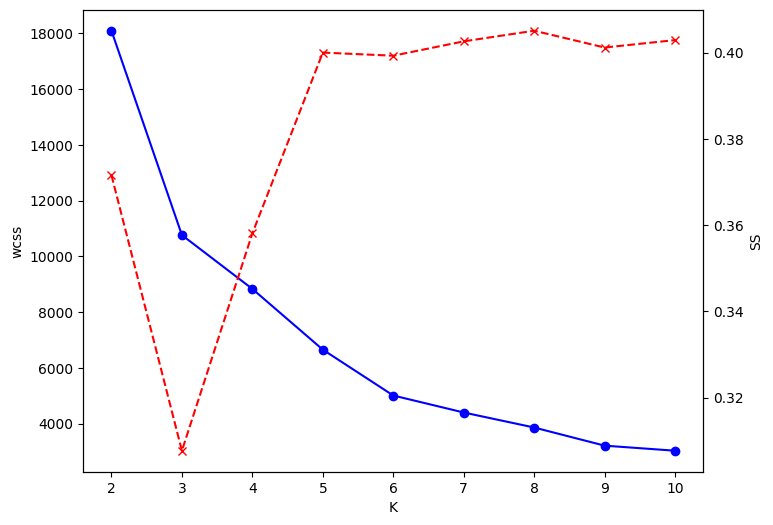

In [9]:
# combined plot

k_range = range(2, 11)
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.plot(k_range, wcss[:len(k_range)], marker = 'o', color = 'blue')
ax1.set_xlabel('K')
ax1.set_ylabel('wcss')

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker = 'x', color='red', linestyle='--')
ax2.set_ylabel('SS')

# Clustering 

In [10]:
# KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
labels_kmeans = kmeans.fit_predict(X_pca)

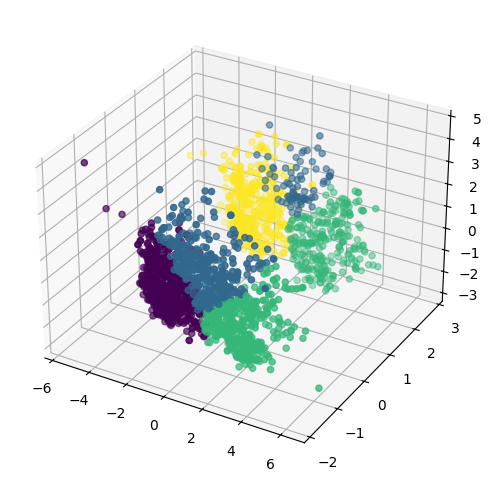

In [12]:
fig= plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], X_pca.iloc[:, 2], c=labels_kmeans)

In [25]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

In [27]:
joblib.dump(kmeans, '../models/KMeans_model.pkl')
print("Model saved successfully in the models/ folder!")

Model saved successfully in the models/ folder!


# Agglomerative Clustering

In [13]:
agg_clf = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg = agg_clf.fit_predict(X_pca)

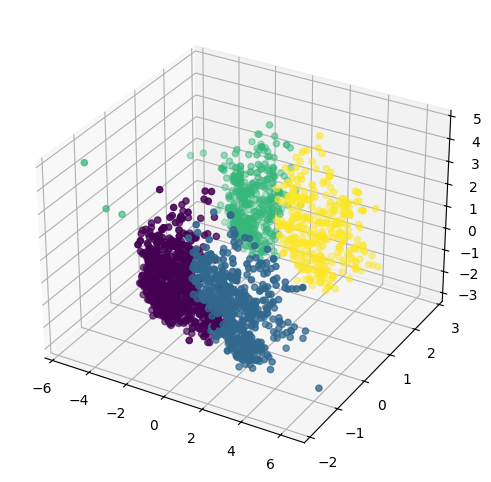

In [15]:
fig= plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], X_pca.iloc[:, 2], c=labels_agg)

In [28]:
joblib.dump(agg_clf, '../models/AgglomerativeClustering_model.pkl')
print("Model saved successfully in the models/ folder!")

Model saved successfully in the models/ folder!


# Characterization of Clusters

In [17]:
X = pd.read_csv('../data/encoded_data.csv')
X['cluster'] = labels_agg

In [18]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

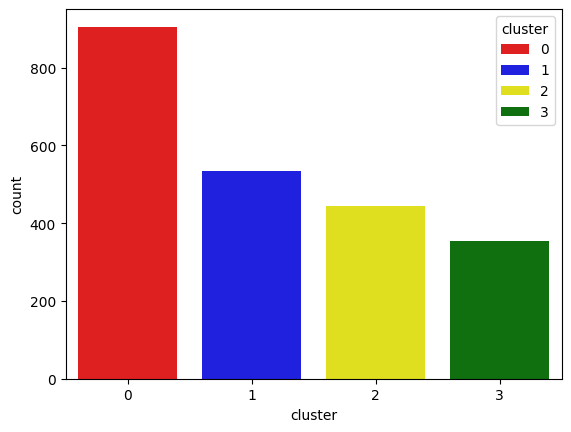

In [21]:
pal = ['red', 'blue', 'yellow', 'green']
sns.countplot(x=X['cluster'], palette=pal, hue=X['cluster'])

<Axes: xlabel='Total_Spending', ylabel='Income'>

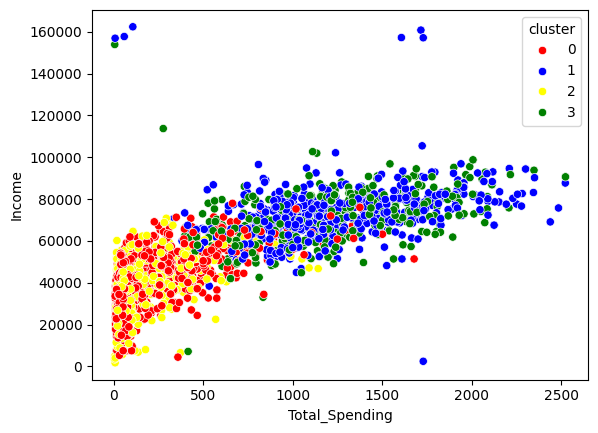

In [22]:
# Income and Spending Patterns
sns.scatterplot(x=X['Total_Spending'], y=X['Income'], hue=X['cluster'], palette=pal)

In [23]:
# Cluster Summary
cluster_summary = X.groupby('cluster').mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         